# Mata Kuliah II3150 Sistem Multimedia
# Divya Maharani Lazuardi 
## NIM: 18220021 (K01)
### Tanggal: 6 Oktober 2022

In [136]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy import fft


## Proses Kompresi


In [137]:
## Membaca file gambar 
ori_img = cv2.imread('divya.jpeg', cv2.IMREAD_UNCHANGED)


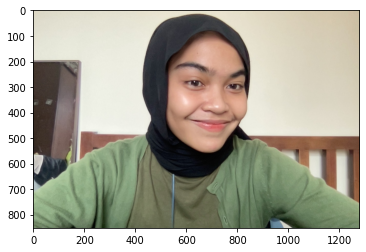

In [138]:
## Menampilkan gambar dengan diagram
show_img = np.zeros(ori_img.shape, np.uint8)
show_img[:,:,0] = ori_img[:,:,2]
show_img[:,:,1] = ori_img[:,:,1]
show_img[:,:,2] = ori_img[:,:,0]
plt.imshow(show_img)
transcol = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

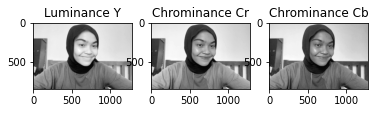

In [139]:
## Mengkonversi RGB to YCbCr
plt.figure()
plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('Chrominance Cr')
plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('Chrominance Cb')
plt.show()

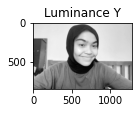

In [140]:
## Mengkonversi RGB to YCbCr
plt.figure()
plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.show()

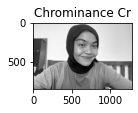

In [141]:
## Mengkonversi RGB to YCbCr
plt.figure()
plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('Chrominance Cr')
plt.show()

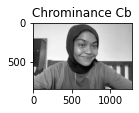

In [142]:
## Mengkonversi RGB to YCbCr
plt.figure()
plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('Chrominance Cb')
plt.show()

In [143]:
## Mengambil komponen Luminance (Y) dari tiap makroblok foto
ori_img2 = cv2.imread('divya.jpeg', 0)
res1_img = ori_img2.astype('float')
res1_img

array([[212., 213., 213., ..., 191., 191., 190.],
       [213., 213., 214., ..., 191., 190., 190.],
       [213., 214., 214., ..., 190., 190., 189.],
       ...,
       [130., 132., 136., ..., 128., 127., 127.],
       [137., 135., 135., ..., 125., 125., 124.],
       [140., 134., 133., ..., 123., 123., 123.]])

In [144]:
## Mengambil bagian kecil dari komponen gambar dan 
## membaginya menjadi makroblok 8x8 pixel dan juga 
## menampilkan tabel warna makroblok komponen Luminance (Y)
macroblock = []
for i in range (200, 208):
    macroblock.append(res1_img[i][0:8])
macroblock = np.array(macroblock)
before_img = np.array(macroblock)
macroblock

array([[158., 158., 156., 154., 153., 156., 158., 159.],
       [150., 150., 150., 149., 150., 151., 150., 147.],
       [123., 126., 129., 130., 128., 124., 119., 114.],
       [ 84.,  88.,  90.,  88.,  84.,  83.,  83.,  82.],
       [ 53.,  51.,  46.,  41.,  40.,  46.,  52.,  55.],
       [ 35.,  32.,  28.,  29.,  37.,  46.,  51.,  52.],
       [ 52.,  52.,  52.,  52.,  54.,  54.,  51.,  47.],
       [ 50.,  55.,  59.,  58.,  54.,  53.,  53.,  53.]])

In [145]:
## Mengurangi nilai warna dengan 128
## dan menampilkan warna setelah dikurangi 128
macroblock -= 128
macroblock

array([[  30.,   30.,   28.,   26.,   25.,   28.,   30.,   31.],
       [  22.,   22.,   22.,   21.,   22.,   23.,   22.,   19.],
       [  -5.,   -2.,    1.,    2.,    0.,   -4.,   -9.,  -14.],
       [ -44.,  -40.,  -38.,  -40.,  -44.,  -45.,  -45.,  -46.],
       [ -75.,  -77.,  -82.,  -87.,  -88.,  -82.,  -76.,  -73.],
       [ -93.,  -96., -100.,  -99.,  -91.,  -82.,  -77.,  -76.],
       [ -76.,  -76.,  -76.,  -76.,  -74.,  -74.,  -77.,  -81.],
       [ -78.,  -73.,  -69.,  -70.,  -74.,  -75.,  -75.,  -75.]])

In [146]:
## Menghitung nilai warna rumus DCT 
dct_img = fft.dct(macroblock)
dct_img

array([[ 4.56000000e+02, -1.57138992e+00,  2.15390581e+01,
        -2.77407969e+00, -5.65685425e+00,  5.51798759e-01,
         2.62632387e-01, -2.35175120e+00],
       [ 3.46000000e+02,  4.38339057e+00, -4.46088499e+00,
         8.06152870e+00, -7.07106781e+00,  1.28030153e+00,
         3.17025336e-01,  1.46917327e+00],
       [-6.20000000e+01,  3.56307732e+01, -4.49258753e+01,
         2.05054777e-01, -4.24264069e+00,  1.54605194e+00,
        -1.29063164e+00,  1.25197535e-01],
       [-6.84000000e+02,  2.15765431e+01, -1.26172881e+01,
        -1.68005806e+01, -8.48528137e+00,  1.79744953e+00,
        -8.96683058e-01, -9.81048713e-01],
       [-1.28000000e+03, -5.19589970e+00,  5.83085303e+01,
        -4.04683827e+00, -8.48528137e+00,  1.40222885e+00,
         3.39555632e-01, -1.63079138e+00],
       [-1.42800000e+03, -8.80645183e+01,  4.56912421e+01,
         2.33408592e+01, -5.65685425e+00, -1.94631266e+00,
        -5.57127426e-01,  2.38256350e-01],
       [-1.22000000e+03,  8.468149

In [147]:
## Memasukkan nilai tabel kuantisasi
quantization = np.matrix('16 11 10 16 24 40 51 61;\
    12 12 14 19 26 58 60 55;\
    14 13 16 24 40 57 69 56;\
    14 17 22 29 51 87 80 62;\
    18 22 37 56 68 109 103 77;\
    24 35 55 64 81 104 113 92;\
    49 64 78 87 103 121 120 101;\
    72 92 95 98 112 100 103 99').astype('float')
quantization = np.array(quantization.tolist())
quantization

array([[ 16.,  11.,  10.,  16.,  24.,  40.,  51.,  61.],
       [ 12.,  12.,  14.,  19.,  26.,  58.,  60.,  55.],
       [ 14.,  13.,  16.,  24.,  40.,  57.,  69.,  56.],
       [ 14.,  17.,  22.,  29.,  51.,  87.,  80.,  62.],
       [ 18.,  22.,  37.,  56.,  68., 109., 103.,  77.],
       [ 24.,  35.,  55.,  64.,  81., 104., 113.,  92.],
       [ 49.,  64.,  78.,  87., 103., 121., 120., 101.],
       [ 72.,  92.,  95.,  98., 112., 100., 103.,  99.]])

In [148]:
## Membagi nilai warna dengan nilai pada tabel kuantisasi dan dibulatkan
for i in range(8):
    for j in range(8):
        dct_img[i][j] = round(dct_img[i][j]/quantization[i][j])
dct_img

array([[ 28.,   0.,   2.,   0.,   0.,   0.,   0.,   0.],
       [ 29.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -4.,   3.,  -3.,   0.,   0.,   0.,   0.,   0.],
       [-49.,   1.,  -1.,  -1.,   0.,   0.,   0.,   0.],
       [-71.,   0.,   2.,   0.,   0.,   0.,   0.,   0.],
       [-60.,  -3.,   1.,   0.,   0.,   0.,   0.,   0.],
       [-25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

## Proses Dekompresi 

In [149]:
## Mengalikan nilai warna dengan nilai pada tabel kuantisasi dan dibulatkan
idct_img = dct_img
for i in range(8):
    for j in range(8):
        idct_img[i][j] = round(dct_img[i][j]*quantization[i][j])
idct_img

array([[  448.,     0.,    20.,     0.,     0.,     0.,     0.,     0.],
       [  348.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [  -56.,    39.,   -48.,     0.,     0.,     0.,     0.,     0.],
       [ -686.,    17.,   -22.,   -29.,     0.,     0.,     0.,     0.],
       [-1278.,     0.,    74.,     0.,     0.,     0.,     0.,     0.],
       [-1440.,  -105.,    55.,     0.,     0.,     0.,     0.,     0.],
       [-1225.,     0.,     0.,     0.,     0.,     0.,     0.,     0.],
       [-1152.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]])

In [150]:
## Nilai warna kemudian dihitung lagi dengan rumus Invers DCT dan dibulatkan.
from scipy.fftpack import idct
idct_img = fft.idct(dct_img)
for i in range(8):
    for j in range(8):
        idct_img[i][j] = round(idct_img[i][j])
idct_img

array([[  30.,   29.,   27.,   26.,   26.,   27.,   29.,   30.],
       [  22.,   22.,   22.,   22.,   22.,   22.,   22.,   22.],
       [  -4.,   -2.,    2.,    3.,    1.,   -4.,  -10.,  -14.],
       [ -46.,  -41.,  -37.,  -38.,  -43.,  -47.,  -46.,  -44.],
       [ -71.,  -76.,  -83.,  -88.,  -88.,  -83.,  -76.,  -71.],
       [ -97.,  -98., -100.,  -99.,  -94.,  -85.,  -76.,  -71.],
       [ -77.,  -77.,  -77.,  -77.,  -77.,  -77.,  -77.,  -77.],
       [ -72.,  -72.,  -72.,  -72.,  -72.,  -72.,  -72.,  -72.]])

In [151]:
## Menambahkan nilai warna dengan nilai 128
idct_img += 128
after_img = idct_img
after_img

array([[158., 157., 155., 154., 154., 155., 157., 158.],
       [150., 150., 150., 150., 150., 150., 150., 150.],
       [124., 126., 130., 131., 129., 124., 118., 114.],
       [ 82.,  87.,  91.,  90.,  85.,  81.,  82.,  84.],
       [ 57.,  52.,  45.,  40.,  40.,  45.,  52.,  57.],
       [ 31.,  30.,  28.,  29.,  34.,  43.,  52.,  57.],
       [ 51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.],
       [ 56.,  56.,  56.,  56.,  56.,  56.,  56.,  56.]])

In [152]:
cv2.imwrite('before_img.jpeg', before_img)
cv2.imwrite('after_img.jpeg', after_img)

True

In [153]:
before_img

array([[158., 158., 156., 154., 153., 156., 158., 159.],
       [150., 150., 150., 149., 150., 151., 150., 147.],
       [123., 126., 129., 130., 128., 124., 119., 114.],
       [ 84.,  88.,  90.,  88.,  84.,  83.,  83.,  82.],
       [ 53.,  51.,  46.,  41.,  40.,  46.,  52.,  55.],
       [ 35.,  32.,  28.,  29.,  37.,  46.,  51.,  52.],
       [ 52.,  52.,  52.,  52.,  54.,  54.,  51.,  47.],
       [ 50.,  55.,  59.,  58.,  54.,  53.,  53.,  53.]])

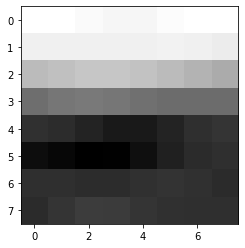

In [154]:
img_before_plot = mpimg.imread('before_img.jpeg')
before_plot = plt.imshow(img_before_plot, cmap="gray")
plt.show()

In [155]:
after_img

array([[158., 157., 155., 154., 154., 155., 157., 158.],
       [150., 150., 150., 150., 150., 150., 150., 150.],
       [124., 126., 130., 131., 129., 124., 118., 114.],
       [ 82.,  87.,  91.,  90.,  85.,  81.,  82.,  84.],
       [ 57.,  52.,  45.,  40.,  40.,  45.,  52.,  57.],
       [ 31.,  30.,  28.,  29.,  34.,  43.,  52.,  57.],
       [ 51.,  51.,  51.,  51.,  51.,  51.,  51.,  51.],
       [ 56.,  56.,  56.,  56.,  56.,  56.,  56.,  56.]])

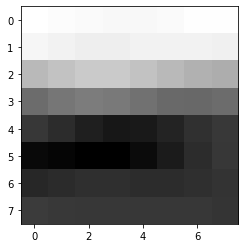

In [156]:
img_after_plot = mpimg.imread('after_img.jpeg')
after_plot = plt.imshow(img_after_plot, cmap="gray")
plt.show()